In [1]:
%pylab inline
import avians.util.image as aui
import video_search as vs
import cv2
import os
import glob
lmfs = glob.glob("Arabic/working-set-1/*.lm2")
print(lmfs)


Populating the interactive namespace from numpy and matplotlib


Using Theano backend.
/home/iesahin/Environments/avians/lib/python3.5/site-packages/theano/misc/pycuda_init.py:35: UserWarning: PyCUDA import failed in theano.misc.pycuda_init
  warnings.warn("PyCUDA import failed in theano.misc.pycuda_init")
Using gpu device 0: GeForce GTX 980 Ti (CNMeM is enabled with initial size: 80.0% of memory, cuDNN 5004)


['Arabic/working-set-1/HRC000366-HRC000366_03^52.786.lm2', 'Arabic/working-set-1/HRC000123-HRC000123_01^00.667.lm2', 'Arabic/working-set-1/euronews-1-img1092.lm2', 'Arabic/working-set-1/HRC000369-HRC000369_00^44.922.lm2', 'Arabic/working-set-1/al-jazeera-1-img2610.lm2', 'Arabic/working-set-1/HRC000467-HRC000467_00^19.776.lm2', 'Arabic/working-set-1/HRC000323-HRC000323_01^40.203.lm2', 'Arabic/working-set-1/HRC000232-HRC000232_07^37.654.lm2', 'Arabic/working-set-1/HRC000005-HRC000005_00^34.724.lm2', 'Arabic/working-set-1/HRC000525-HRC000525_00^55.392.lm2', 'Arabic/working-set-1/al-jazeera-3-img477.lm2', 'Arabic/working-set-1/HRC000221-HRC000221_01^24.654.lm2', 'Arabic/working-set-1/HRC000318-HRC000318_00^15.460.lm2', 'Arabic/working-set-1/HRC000263-HRC000263_00^41.924.lm2', 'Arabic/working-set-1/HRC000294-HRC000294_00^57.856.lm2', 'Arabic/working-set-1/HRC000286-HRC000286_10^48.141.lm2', 'Arabic/working-set-1/HRC000041-HRC000041_00^30.935.lm2', 'Arabic/working-set-1/HRC000304-HRC000304_0

In [3]:
lmf = lmfs[0]
lm = vs.load_labelmap(lmf)
print(lm['images'].shape)

(390, 720, 1280)


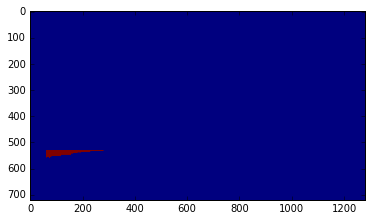

In [4]:
imshow(lm['images'][0])

In [5]:
imgs = lm['images']
imgs.shape
imgs.swapaxes(0, 1).shape
aui.img_bounding_box(imgs[0])

array([[18, 48],
       [62, 31]], dtype=uint8)

In [6]:
imgs[0].nonzero()[1].max()

286

In [7]:
import cv2
def draw_rect_around_nonzero(img, padding=0, thickness=1, color=(255, 0, 255)):
    assert len(img.shape) == 2
    nz = img.nonzero()
    min0 = max(nz[0].min() - padding, 0)
    max0 = min(nz[0].max() + padding, img.shape[0])
    min1 = max(nz[1].min() - padding, 0)
    max1 = min(nz[1].max() + padding, img.shape[1])
    out_img = np.dstack((imgs[0], imgs[0], imgs[0]))
    cv2.rectangle(out_img, (min1, min0), (max1, max0), thickness=thickness, color=color)
    return out_img

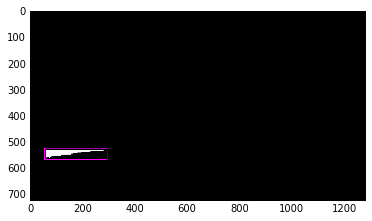

In [8]:
imshow(draw_rect_around_nonzero(imgs[0], padding=7, thickness=2))

In [9]:
def yank_nonzero(img, padding=0): 
    nz = img.nonzero()
    min0 = max(nz[0].min() - padding, 0)
    max0 = min(nz[0].max() + padding, img.shape[0])
    min1 = max(nz[1].min() - padding, 0)
    max1 = min(nz[1].max() + padding, img.shape[1])
    return img[min0:max0, min1:max1].copy()
    

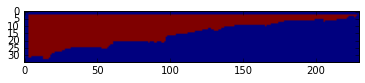

In [10]:
imshow(yank_nonzero(imgs[0], padding=3))

In [11]:
lbl = lm['labels']

In [12]:
lm.keys()

['component_map', 'images', 'stats', 'labels']

In [13]:
lbl = lm['labels']
sts = lm['stats']
cmap = lm['component_map']
imgs = lm['images']

In [14]:
search_res = vs.search_string_in_component_map(lm, 'b')

In [15]:
search_res

array([(b'kkkkke', 0.04, 0.04, 0.04, 530, 62, 560, 287),
       (b'mzxfzzz', 0.02, 0.02, 0.02, 530, 62, 560, 287)], 
      dtype=[('string', 'S64'), ('total_probability', '<f8'), ('average_probability', '<f8'), ('conditional_probability', '<f8'), ('min_x', '<i8'), ('min_y', '<i8'), ('max_x', '<i8'), ('max_y', '<i8')])

In [20]:
ind_b = vs._search_stems(lm, 'b')

In [18]:
lbl[3, 1]

(b'b', 0.1)

In [19]:
lbl[4, 9]

(b'b', 0.02)

In [22]:
ind_b

array([[(3, 1)],
       [(4, 9)]], 
      dtype=[('label_i', '<i8'), ('label_j', '<i8')])

In [34]:
lbl[ind_b['label_i'][0], ind_b['label_j'][0]]

array([(b'b', 0.1)], 
      dtype=[('label', 'S64'), ('prob', '<f8')])

In [2]:
import avians.detect.nm_detect as adnd

In [3]:
imgfs = glob.glob(os.path.expandvars("$HOME/Annex/Arabic/working-set-1/*.jpg"))
imgf0 = imgfs[0]
img0 = cv2.imread(imgf0)

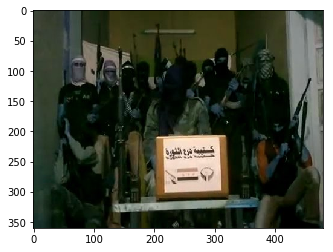

In [4]:
imshow(img0)

In [6]:
tc0 = adnd.find_text_components(img0)

In [13]:
ch = adnd.find_channels(img0)
ch

[array([[57, 57, 58, ..., 23, 23, 24],
        [56, 57, 58, ..., 27, 27, 27],
        [55, 56, 57, ..., 32, 32, 32],
        ..., 
        [18, 19, 21, ..., 30, 33, 27],
        [17, 18, 21, ..., 28, 30, 22],
        [17, 18, 20, ..., 29, 27, 19]], dtype=uint8),
 array([[67, 67, 68, ..., 42, 41, 42],
        [66, 67, 68, ..., 46, 45, 45],
        [65, 66, 67, ..., 50, 50, 50],
        ..., 
        [41, 42, 44, ..., 47, 50, 46],
        [40, 41, 44, ..., 47, 49, 43],
        [40, 41, 43, ..., 48, 48, 40]], dtype=uint8),
 array([[54, 54, 55, ..., 27, 28, 29],
        [53, 54, 55, ..., 31, 32, 32],
        [52, 53, 54, ..., 37, 37, 37],
        ..., 
        [36, 37, 39, ..., 43, 47, 43],
        [35, 36, 39, ..., 44, 46, 40],
        [35, 36, 38, ..., 45, 45, 37]], dtype=uint8),
 array([[61, 61, 62, ..., 32, 32, 33],
        [60, 61, 62, ..., 36, 36, 36],
        [59, 60, 61, ..., 41, 41, 41],
        ..., 
        [30, 31, 32, ..., 38, 42, 36],
        [29, 30, 32, ..., 38, 40, 32],
  

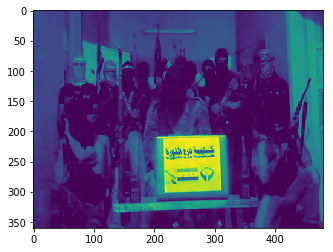

In [15]:
imshow(ch[0])

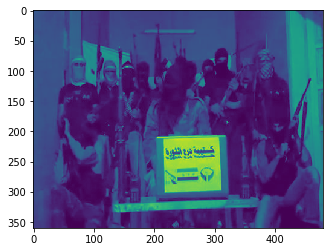

In [16]:
imshow(ch[1])

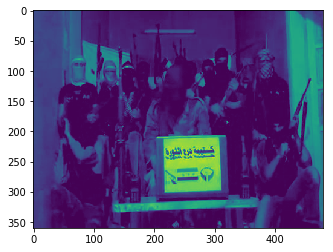

In [17]:
imshow(ch[2])

In [19]:
reg = adnd.find_text_regions(img0, ch)

In [20]:
reg

[[224, 248, 220, 302],
 [224, 246, 219, 303],
 [238, 248, 228, 302],
 [326, 361, 145, 372],
 [224, 245, 219, 303],
 [101, 130, 166, 222],
 [81, 136, 66, 286],
 [243, 261, 221, 297]]

In [21]:
regions = adnd.extract_regions(img0, reg)

In [32]:
imshow(regions[8])

IndexError: index 8 is out of bounds for axis 0 with size 8

In [2]:
os.mkdir('/tmp/td-bin-inv')
%reload adnd

FileExistsError: [Errno 17] File exists: '/tmp/td-bin-inv'

In [5]:
for f in imgfs:
    img = cv2.imread(f)
    ch = adnd.find_channels(img)
    reg = adnd.find_text_regions(img, ch)
    regions = adnd.extract_regions(img, reg)
    bbb = adnd.binarize_by_region(regions, reg)
    for i, r in enumerate(bbb): 
        cv2.imwrite('/tmp/td-bin-inv/' + os.path.basename(f) + '-region-' + str(i) + '.png', r)